In [ ]:
import numpy as np
import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


In [ ]:
data = pd.read_csv("/content/healthcare_data.csv")

In [ ]:
same_data = data.copy()
same_data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0.0,33070.0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2.0,34808.0,31-40,Female,Trauma,Minor,Heart disease,2.0,No,3554.835677,9.0
2,2,gynecology,B,Dr Sophia,8.0,44577.0,21-30,Female,Trauma,Extreme,Diabetes,2.0,Yes,5624.733654,7.0
3,4,gynecology,D,Dr Olivia,7.0,3695.0,31-40,Female,Urgent,Moderate,NaN,4.0,No,4814.149231,8.0
4,2,anesthesia,E,Dr Mark,10.0,108956.0,71-80,Male,Trauma,Moderate,Diabetes,2.0,No,5169.269637,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390053,3,gynecology,D,Dr Olivia,4.0,7599.0,21-30,Female,Emergency,Moderate,NaN,4.0,No,4795.659576,8.0
390054,2,radiotherapy,A,Dr Sam,8.0,47327.0,61-70,Male,Trauma,Moderate,NaN,2.0,No,3498.154548,20.0
390055,6,gynecology,D,Dr Olivia,4.0,58747.0,21-30,Female,Trauma,Moderate,NaN,4.0,No,4288.064129,9.0
390056,5,gynecology,F,Dr Nathan,2.0,11399.0,21-30,Female,Trauma,Extreme,NaN,3.0,Yes,4179.546825,7.0


In [ ]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0.0,33070.0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2.0,34808.0,31-40,Female,Trauma,Minor,Heart disease,2.0,No,3554.835677,9.0
2,2,gynecology,B,Dr Sophia,8.0,44577.0,21-30,Female,Trauma,Extreme,Diabetes,2.0,Yes,5624.733654,7.0
3,4,gynecology,D,Dr Olivia,7.0,3695.0,31-40,Female,Urgent,Moderate,NaN,4.0,No,4814.149231,8.0
4,2,anesthesia,E,Dr Mark,10.0,108956.0,71-80,Male,Trauma,Moderate,Diabetes,2.0,No,5169.269637,34.0


In [ ]:
data.shape

(390058, 15)

In [ ]:
data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0.0,33070.0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2.0,34808.0,31-40,Female,Trauma,Minor,Heart disease,2.0,No,3554.835677,9.0
2,2,gynecology,B,Dr Sophia,8.0,44577.0,21-30,Female,Trauma,Extreme,Diabetes,2.0,Yes,5624.733654,7.0
3,4,gynecology,D,Dr Olivia,7.0,3695.0,31-40,Female,Urgent,Moderate,NaN,4.0,No,4814.149231,8.0
4,2,anesthesia,E,Dr Mark,10.0,108956.0,71-80,Male,Trauma,Moderate,Diabetes,2.0,No,5169.269637,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390053,3,gynecology,D,Dr Olivia,4.0,7599.0,21-30,Female,Emergency,Moderate,NaN,4.0,No,4795.659576,8.0
390054,2,radiotherapy,A,Dr Sam,8.0,47327.0,61-70,Male,Trauma,Moderate,NaN,2.0,No,3498.154548,20.0
390055,6,gynecology,D,Dr Olivia,4.0,58747.0,21-30,Female,Trauma,Moderate,NaN,4.0,No,4288.064129,9.0
390056,5,gynecology,F,Dr Nathan,2.0,11399.0,21-30,Female,Trauma,Extreme,NaN,3.0,Yes,4179.546825,7.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390058 entries, 0 to 390057
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  390058 non-null  int64  
 1   Department                         390058 non-null  object 
 2   Ward_Facility_Code                 390058 non-null  object 
 3   doctor_name                        390058 non-null  object 
 4   staff_available                    390057 non-null  float64
 5   patientid                          390057 non-null  float64
 6   Age                                390057 non-null  object 
 7   gender                             390057 non-null  object 
 8   Type of Admission                  390057 non-null  object 
 9   Severity of Illness                390057 non-null  object 
 10  health_conditions                  258479 non-null  object 
 11  Visitors with Patient              3900

In [ ]:
data['patientid'].value_counts()

patientid
44572.0     18
125618.0    17
126681.0    17
125465.0    16
126701.0    16
            ..
73810.0      1
60765.0      1
31985.0      1
81431.0      1
157.0        1
Name: count, Length: 121193, dtype: int64

In [ ]:
data = data.drop(columns=["patientid"])
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0.0,41-50,Female,Trauma,Extreme,Diabetes,4.0,Yes,2966.408696,8.0
1,4,gynecology,B,Dr Sophia,2.0,31-40,Female,Trauma,Minor,Heart disease,2.0,No,3554.835677,9.0
2,2,gynecology,B,Dr Sophia,8.0,21-30,Female,Trauma,Extreme,Diabetes,2.0,Yes,5624.733654,7.0
3,4,gynecology,D,Dr Olivia,7.0,31-40,Female,Urgent,Moderate,NaN,4.0,No,4814.149231,8.0
4,2,anesthesia,E,Dr Mark,10.0,71-80,Male,Trauma,Moderate,Diabetes,2.0,No,5169.269637,34.0


In [ ]:
#Duplicates

data.duplicated().sum()
#If there a true, the value will be 1

0

In [ ]:
data.describe().T
#pivots data to see the summary stats

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,56641.0,3.650730,2.711243,0.000000,2.000000,3.000000,4.00000,24.000000
staff_available,56640.0,5.032945,3.156383,0.000000,2.000000,5.000000,8.00000,10.000000
patientid,56640.0,63082.187818,41641.099035,-3146.000000,25500.250000,57889.500000,103011.00000,134163.000000
Visitors with Patient,56640.0,3.540625,2.234834,0.000000,2.000000,3.000000,4.00000,32.000000
Admission_Deposit,56640.0,4734.481205,1050.382567,1776.898276,4077.978306,4635.628695,5103.69384,9451.389018
Stay (in days),56640.0,12.385823,7.911300,3.000000,8.000000,9.000000,11.00000,48.000000


In [ ]:
cat_col = ['Department', 'Type of Admission', 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', 'Ward_Facility_Code', 'Age']
for column in cat_col:
  print(data[column].value_counts(1))
  print('-'*50)  #priting 50 dashes

Department
gynecology            0.686623
radiotherapy          0.168606
anesthesia            0.088240
TB & Chest disease    0.045885
surgery               0.010646
Name: proportion, dtype: float64
--------------------------------------------------
Type of Admission
Trauma       0.620039
Emergency    0.272987
Urgent       0.106974
Name: proportion, dtype: float64
--------------------------------------------------
Severity of Illness
Moderate    0.592020
Minor       0.265078
Extreme     0.142903
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.697846
Male      0.291879
Other     0.010275
Name: proportion, dtype: float64
--------------------------------------------------
Insurance
Yes    0.995004
No     0.004996
Name: proportion, dtype: float64
--------------------------------------------------
health_conditions
Other                  0.354604
Heart disease          0.261749
High Blood Pressure    0.220452
Diabetes               0.14

In [ ]:
#creating histgram boxplot function
#bins = seaborn will detect
#kde - kernal density estimate? normality distribution line
def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
  #gives you two rows that share the same x axis, will pull the figure size from the arugument
  figure, (ax_box, ax_hist) =plt.subplots(2, sharex=True, figsize=figsize) # Use plt.subplots() instead of plt.figure()
  #using seaborn to call boxplot, passing feature x , create the axis set to the box plots axis, this way it doesnt create a new axis.
  #showmeans = will show the mean of the distribution.
  sns.boxplot(data=data, x=feature, ax = ax_box, showmeans=True, color='violet')
  #create a histogram on the ax hist:
  if bins==None:
    sns.histplot(data=data, x=feature, kde = kde, ax = ax_hist)
  else:
    sns.histplot(data=data, x=feature, kde = kde, ax = ax_hist, bins=bins)
    #passing feature mean through
  ax_hist.axvline(data[feature].mean(), color = 'green', linestyle='--') # Fixed typo: 'linestlye' to 'linestyle'
    #creating median
  ax_hist.axvline(data[feature].median(), color = 'black', linestyle='-')


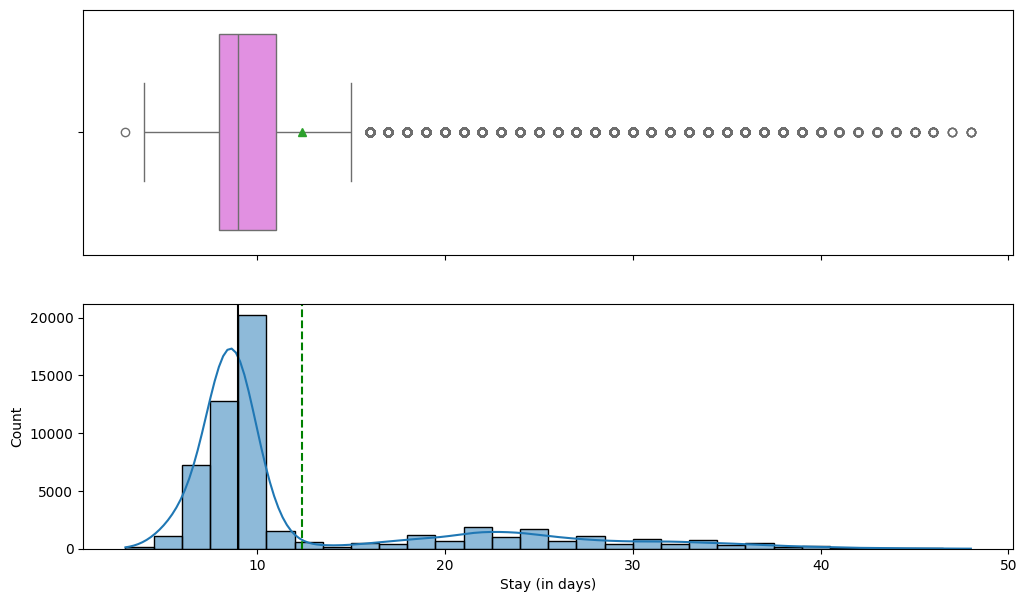

In [ ]:
histogram_boxplot(data,"Stay (in days)", bins=30)

right skew/ whatever way the tail goes, right? anyways, skew seems to be outlier values or tail.

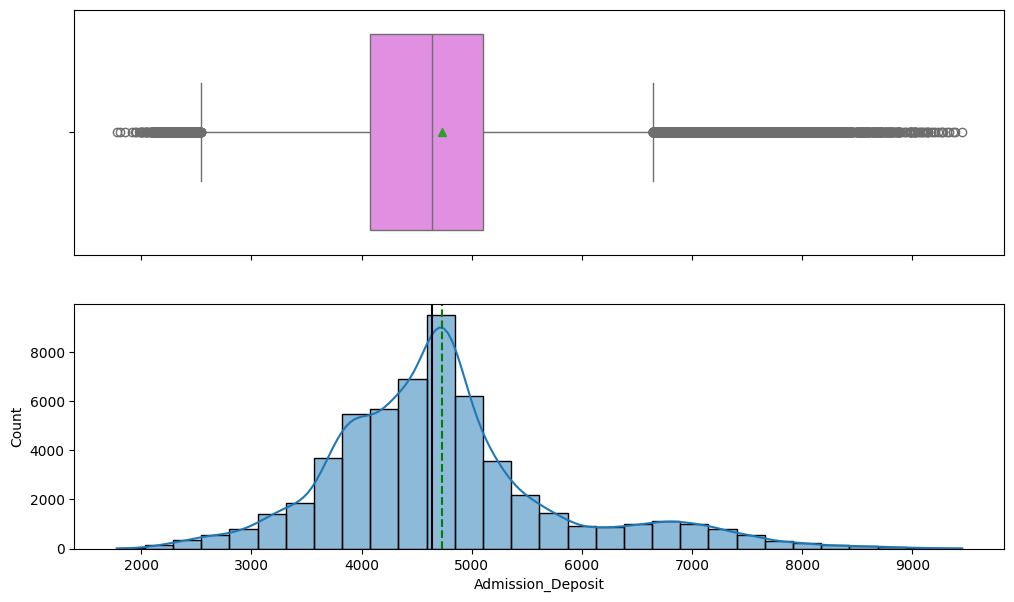

In [ ]:
histogram_boxplot(data,"Admission_Deposit", bins=30)

Bimodal skew lol

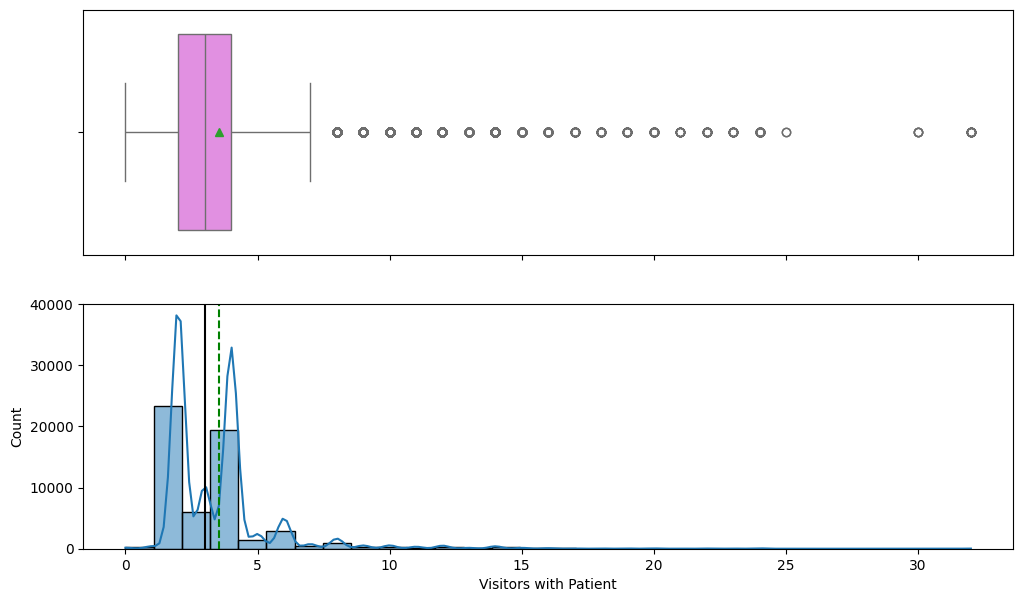

In [ ]:
histogram_boxplot(data,"Visitors with Patient", bins=30)